In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
def alpha_WVMA(df, window):
    """交易量加权的价格变化波动率"""
    # 计算价格变化率的绝对值
    ret = (df['close'] / df['close'].shift(1)) - 1
    abs_ret = np.abs(ret)
    
    # 计算交易量加权的价格变化
    abs_ret_vol = abs_ret * df['volume']
    
    # 计算滚动窗口内的标准差和均值
    std_dev = abs_ret_vol.rolling(window).std()
    mean_val = abs_ret_vol.rolling(window).mean()
    
    # 计算 WVMA 因子
    wvma = std_dev / (mean_val + 1e-12)
    return wvma.ffill().fillna(0)

def alpha_CORD(df, window):
    """价格变化率与交易量变化率之间的相关性"""
    # 计算价格变化率
    price_change = df['close'] / df['close'].shift(1)
    
    # 计算交易量变化率并取对数
    vol_change = df['volume'] / df['volume'].shift(1)
    log_vol_change = np.log(vol_change + 1)
    
    # 计算滚动相关系数
    cord = price_change.rolling(window).corr(log_vol_change)
    return cord.ffill().fillna(0)

def alpha_CORR(df, window):
    """绝对收益价与对数交易量之间的相关性"""
    # 计算对数交易量
    log_volume = np.log(df['volume'] + 1)
    
    # 计算绝对收益价与对数交易量的滚动相关系数
    corr = df['close'].rolling(window).corr(log_volume)
    return corr.ffill().fillna(0)

# 因子测试框架

In [5]:
# 定义要测试的因子及其窗口参数
factors_to_test = {
    'WVMA': [5, 10, 20, 30, 60],
    'CORD': [5, 10, 20, 30, 60],
    'CORR': [5, 10, 20, 30, 60]
}

# 存储所有测试结果
all_results = {}


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.003605
   Rank_IC (Spearman): -0.005864
📊 信息比率:
   IR: 0.016830
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: WVMA_5
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


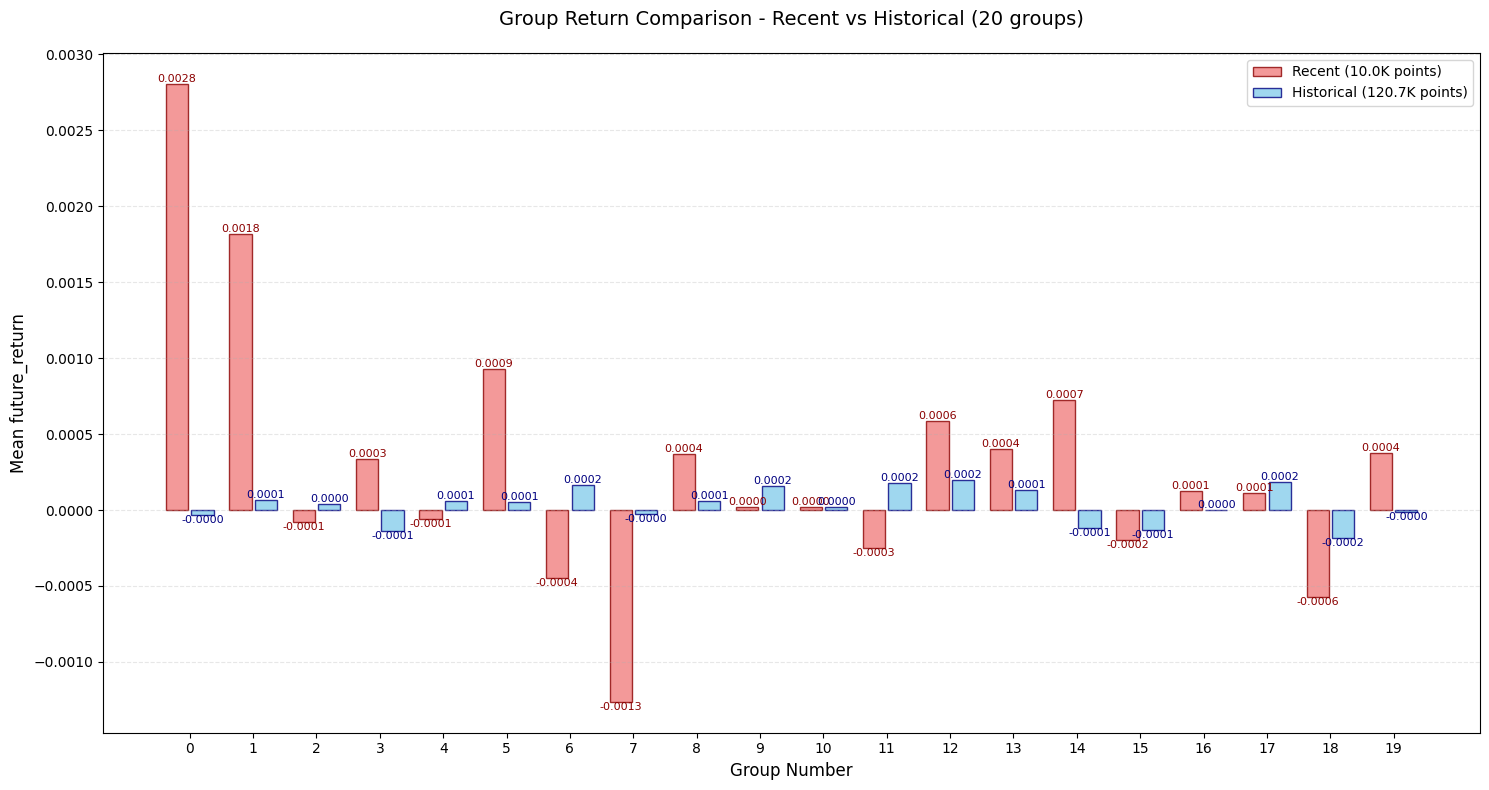

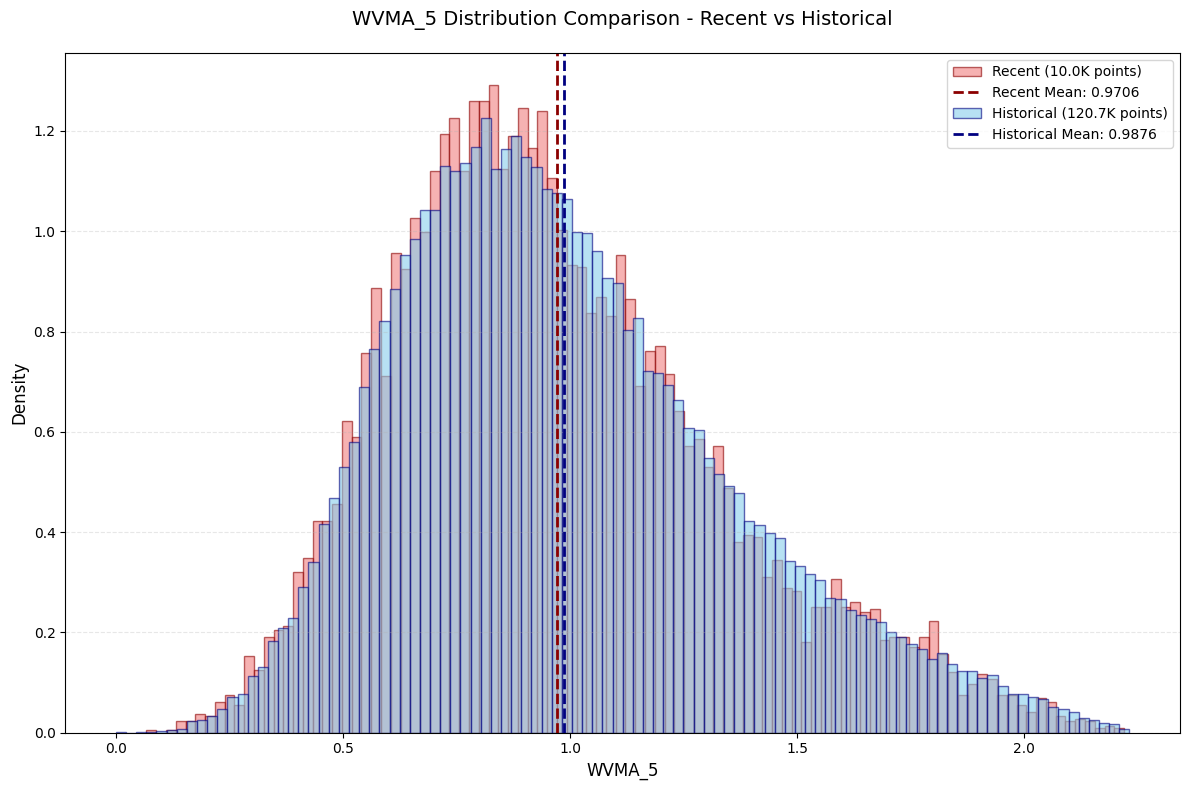

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for WVMA_5

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.001623
   Rank_IC (Spearman): 0.000216
📊 信息比率:
   IR: 0.077265
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: WVMA_10
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


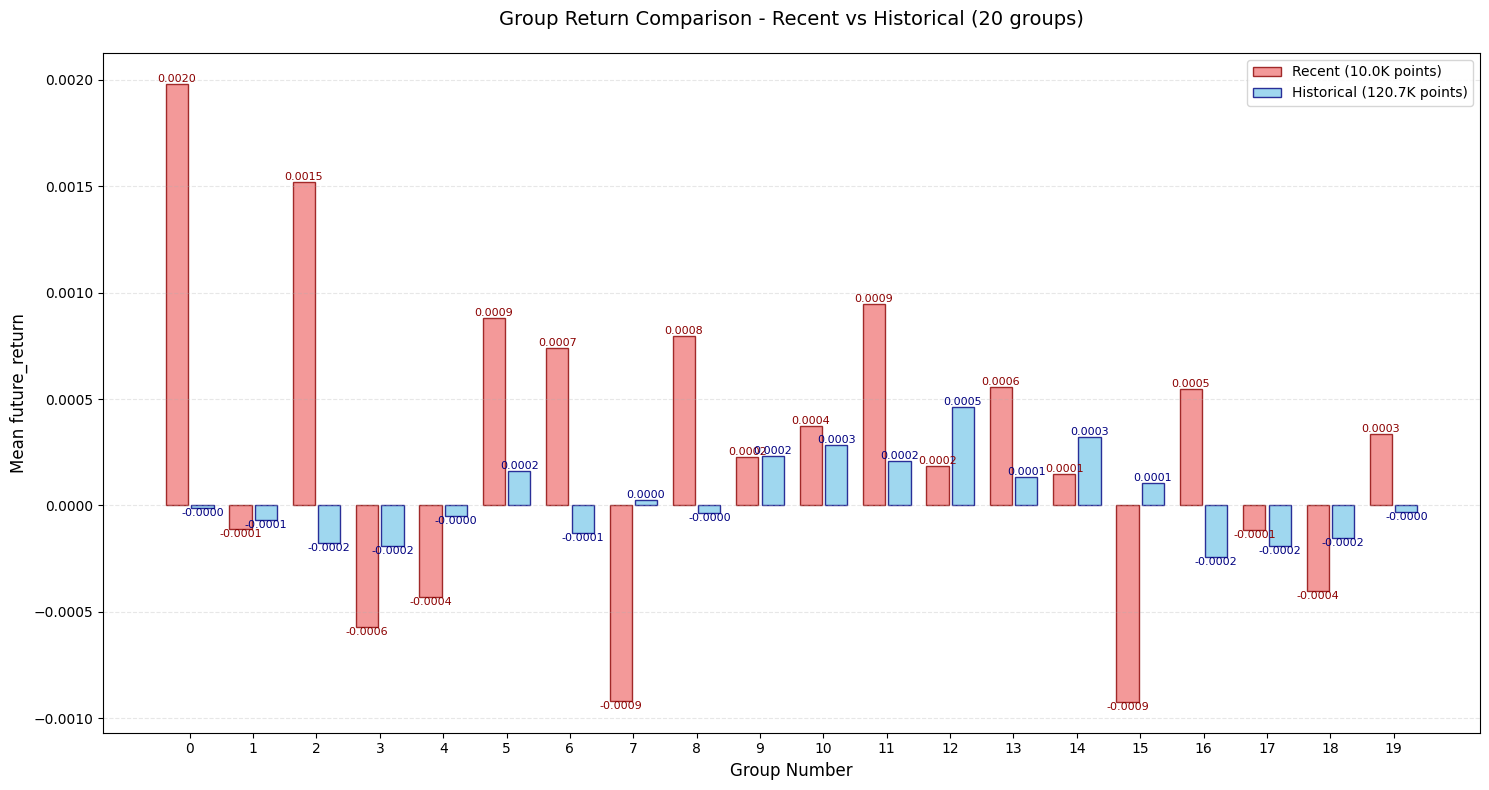

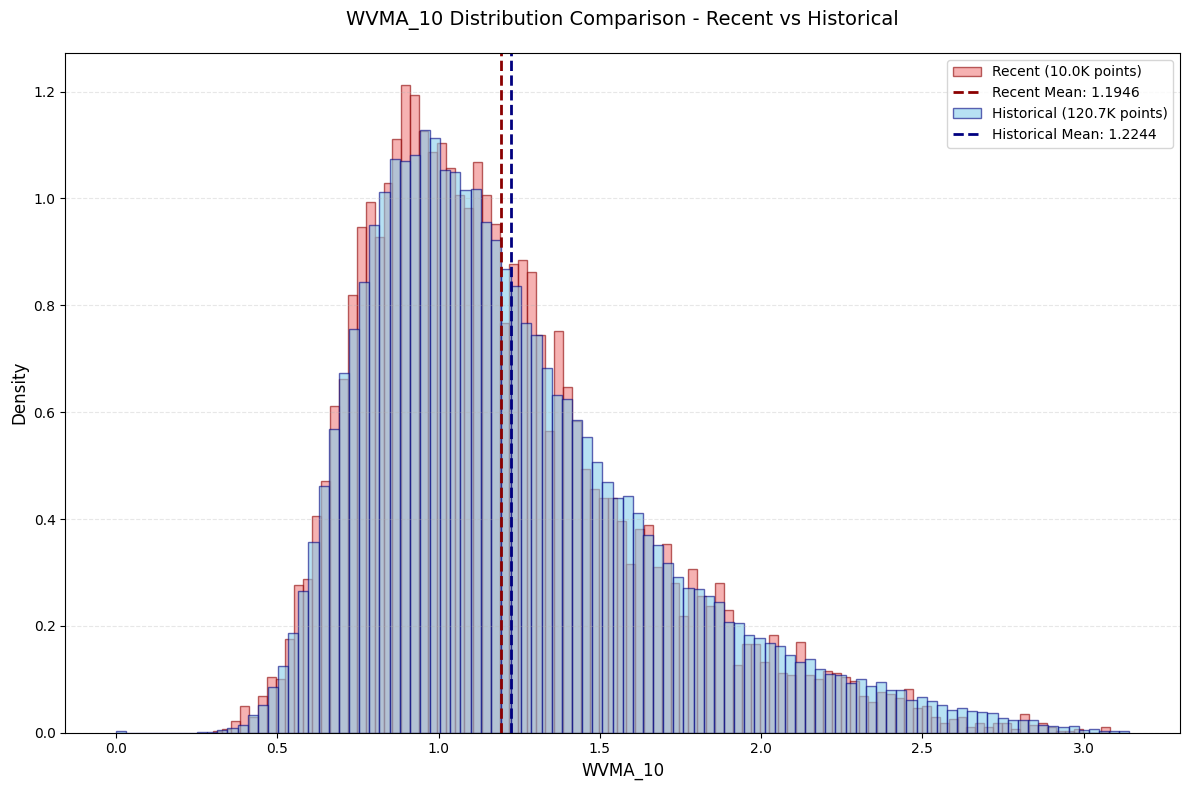

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for WVMA_10

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.005482
   Rank_IC (Spearman): -0.003176
📊 信息比率:
   IR: 0.156393
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: WVMA_20
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


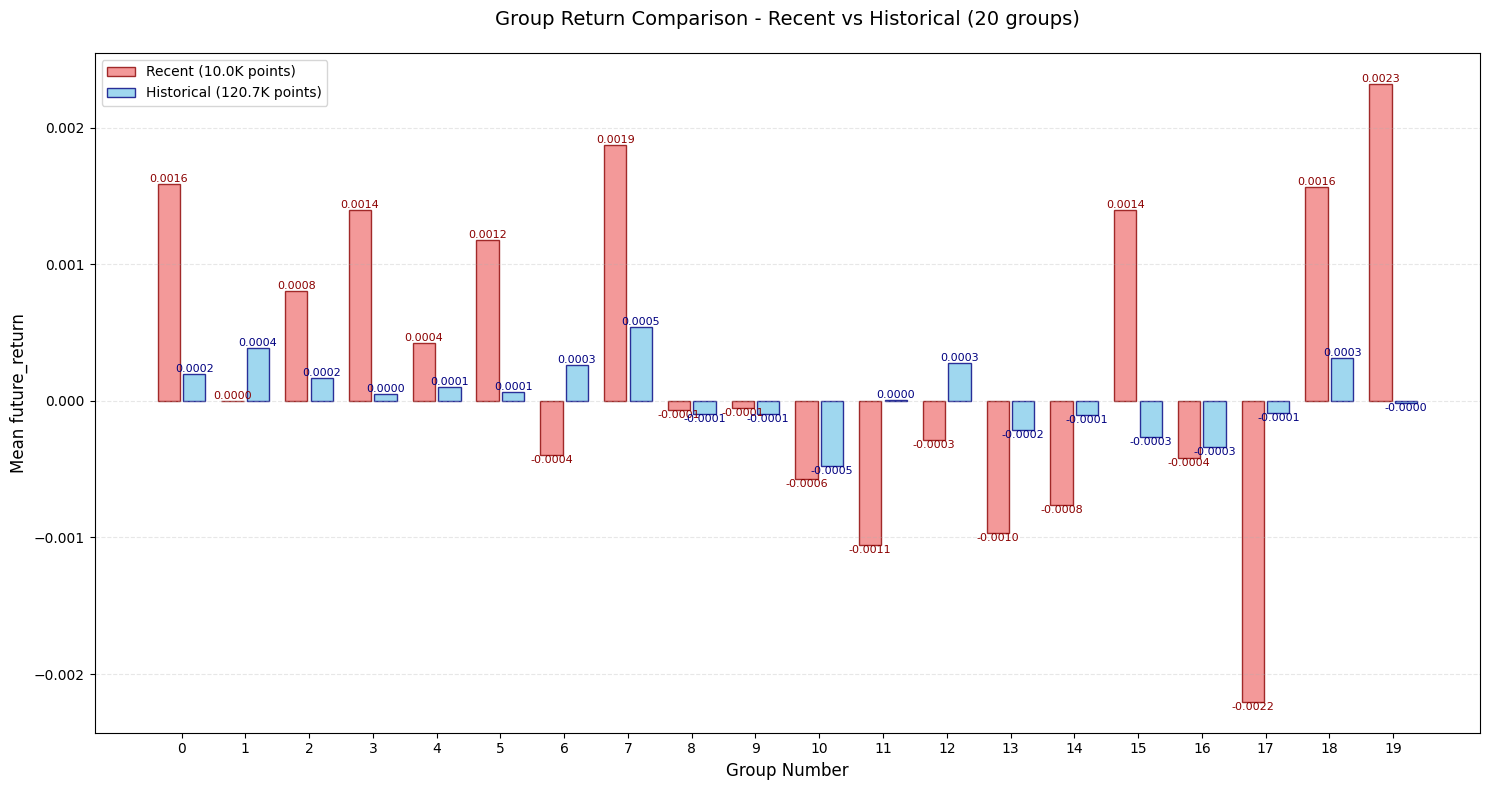

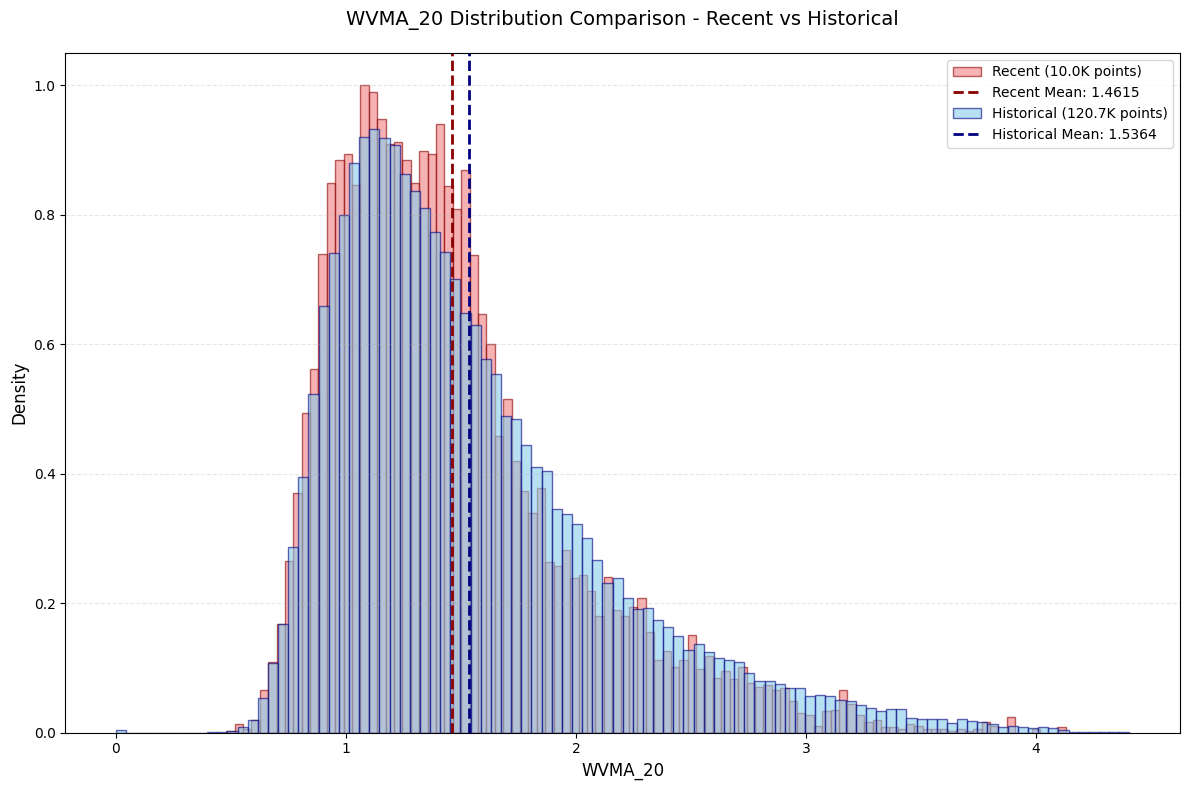

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for WVMA_20

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.001384
   Rank_IC (Spearman): 0.005737
📊 信息比率:
   IR: -0.182982
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: WVMA_30
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


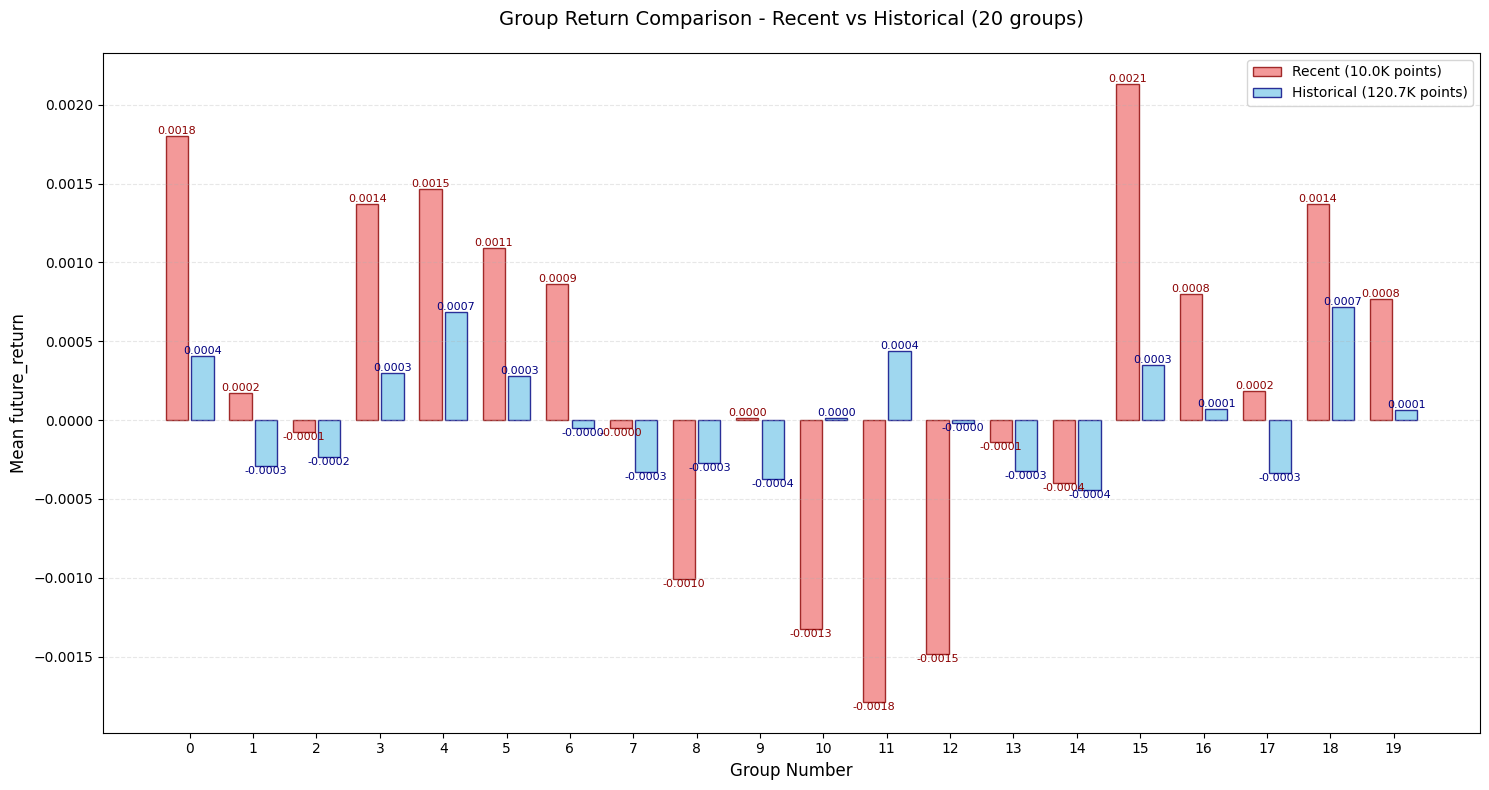

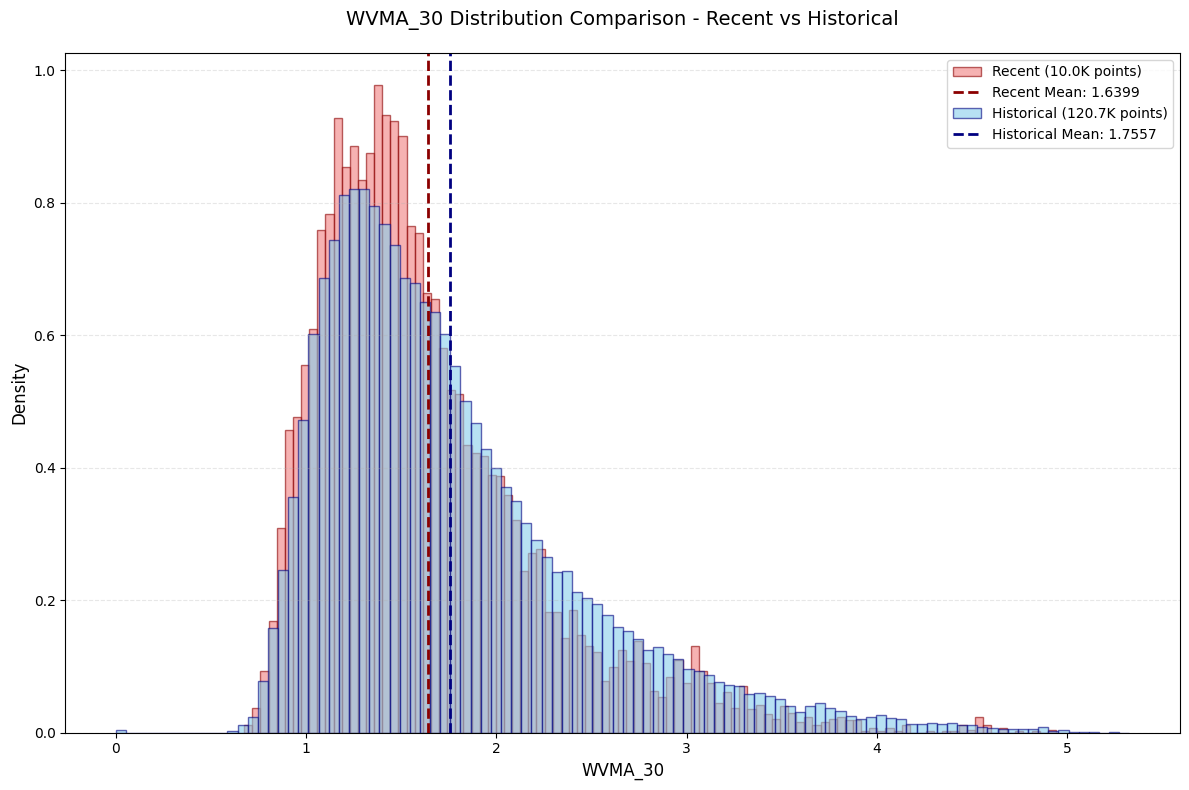

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for WVMA_30

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.001132
   Rank_IC (Spearman): 0.006765
📊 信息比率:
   IR: -0.354869
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: WVMA_60
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


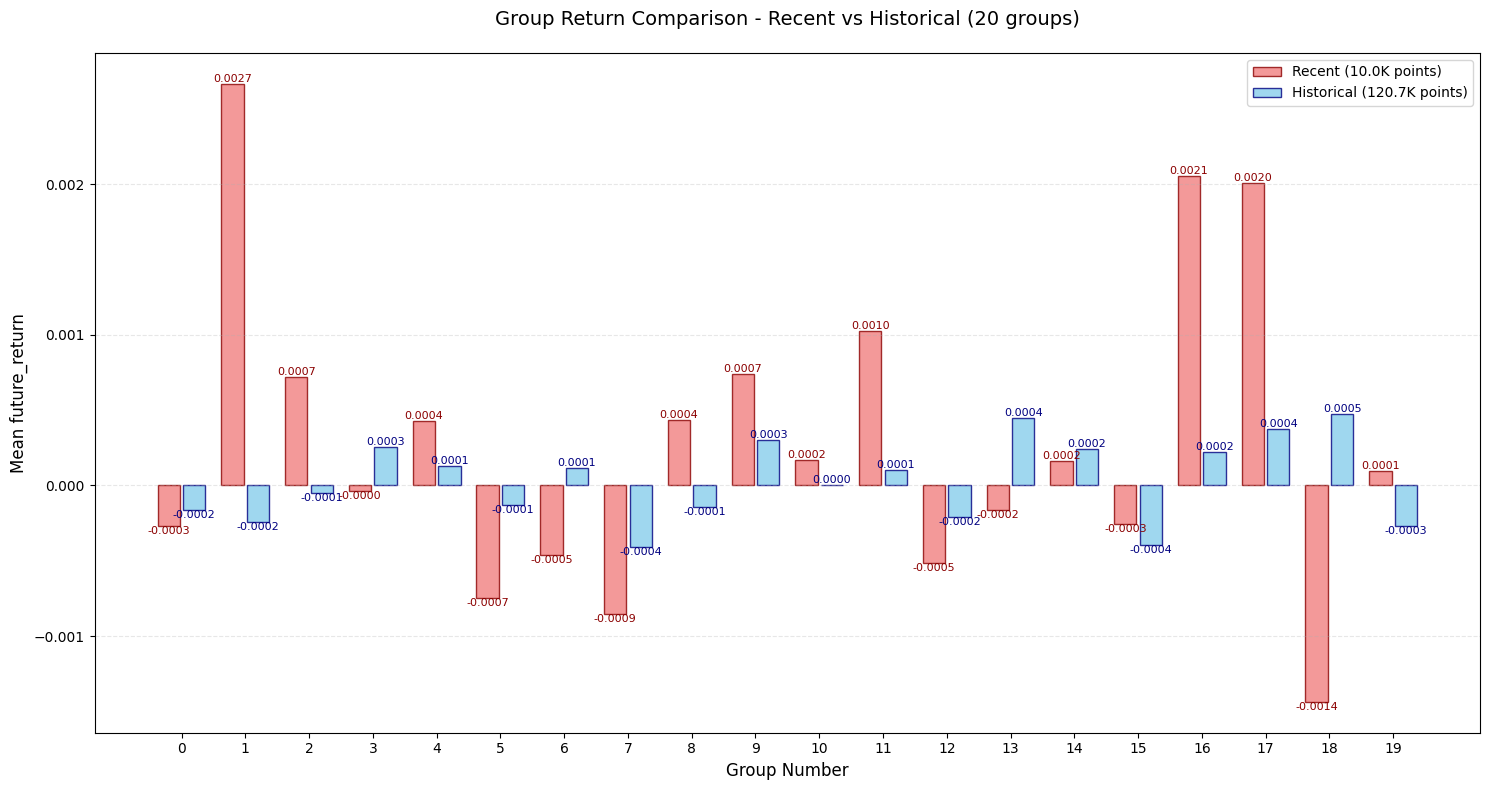

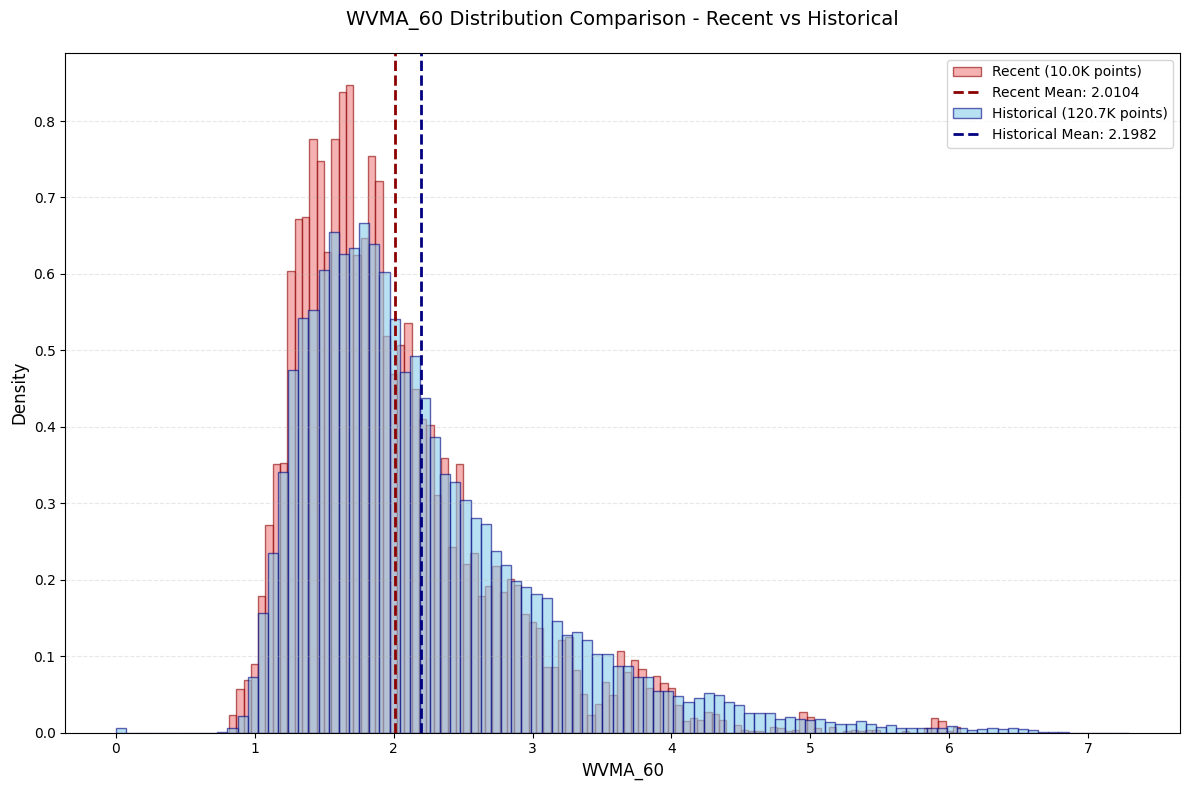

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for WVMA_60

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.004418
   Rank_IC (Spearman): -0.034218
📊 信息比率:
   IR: 0.110988
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORD_5
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


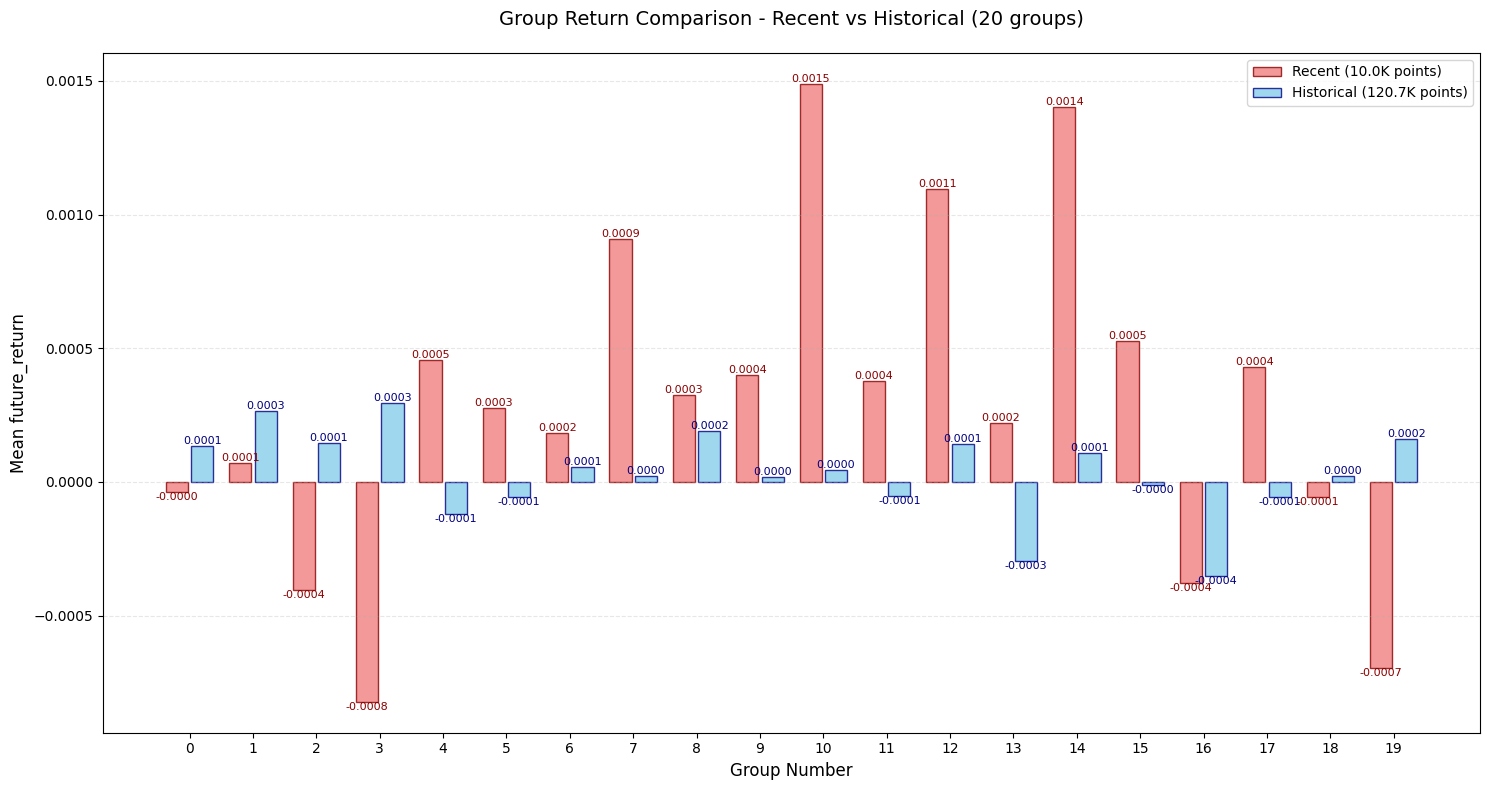

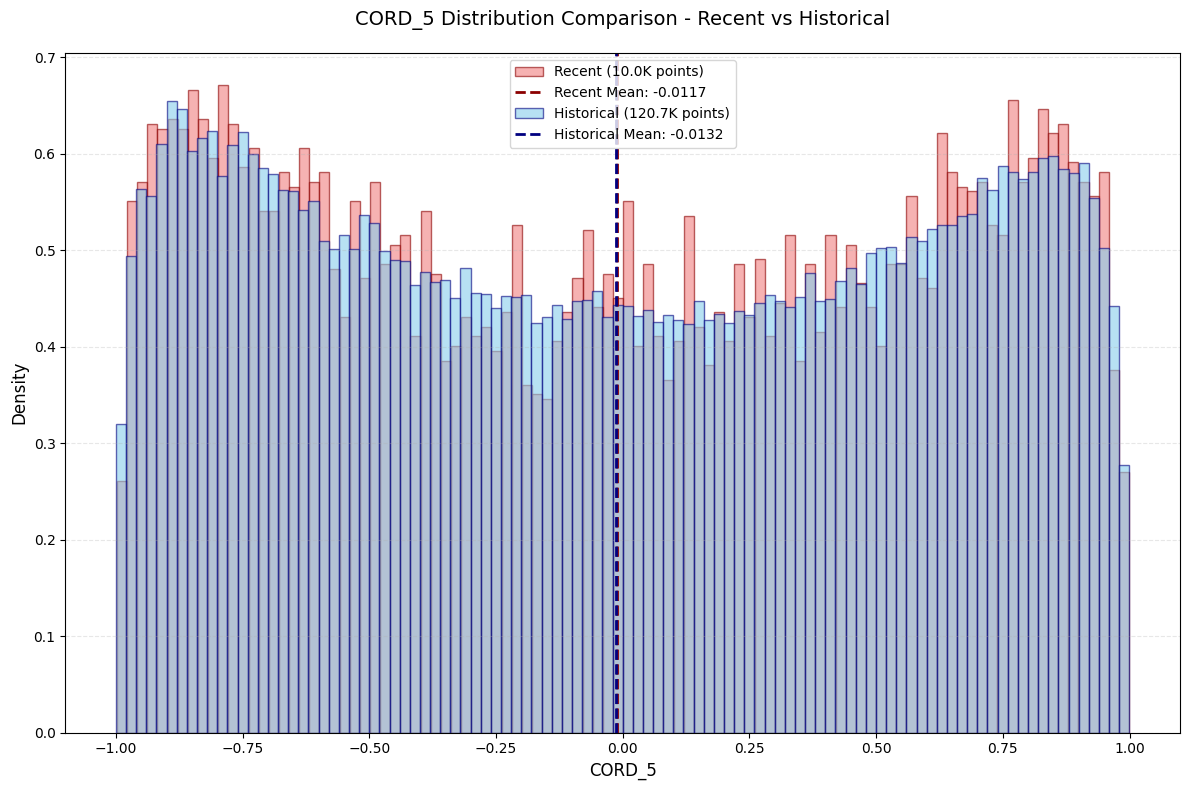

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORD_5

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.004864
   Rank_IC (Spearman): -0.042879
📊 信息比率:
   IR: -0.000621
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORD_10
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


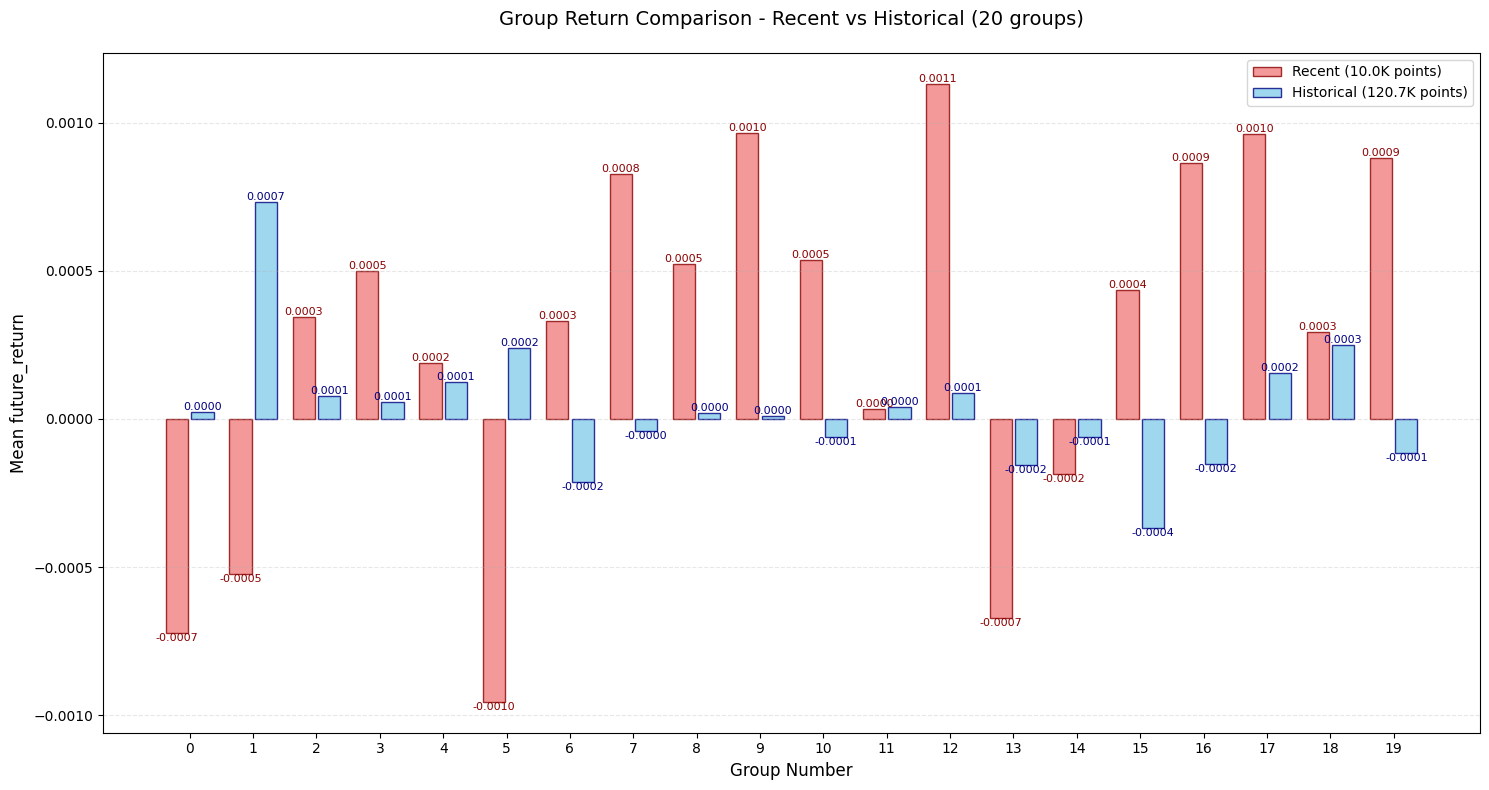

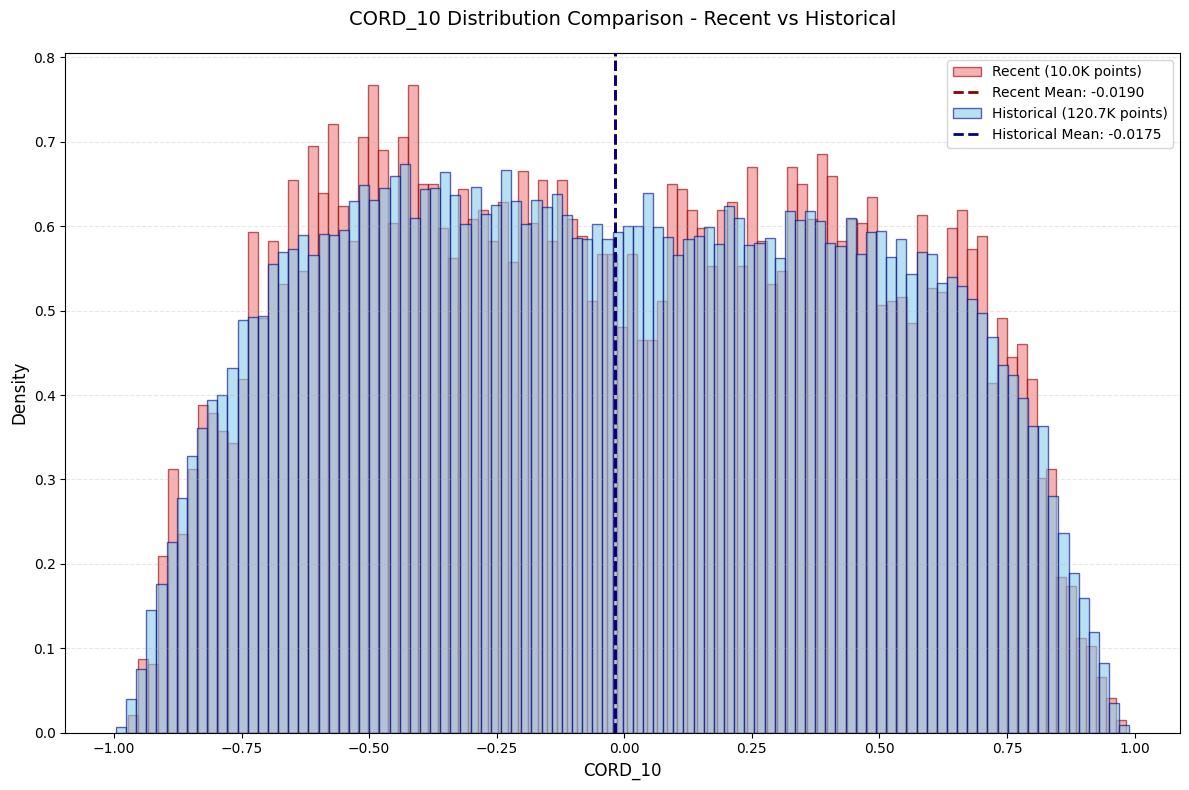

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORD_10

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.000345
   Rank_IC (Spearman): -0.042452
📊 信息比率:
   IR: -0.058345
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORD_20
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


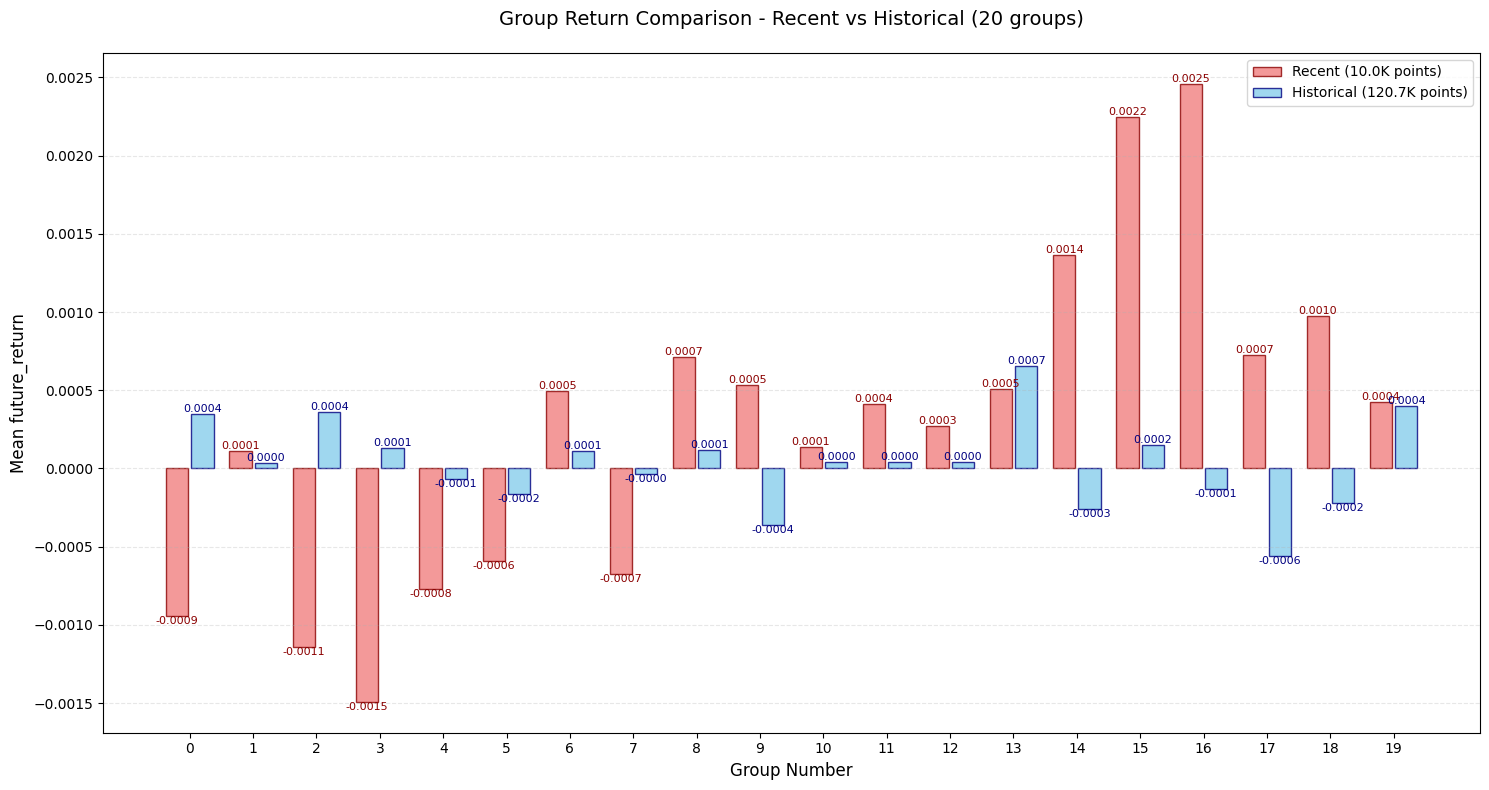

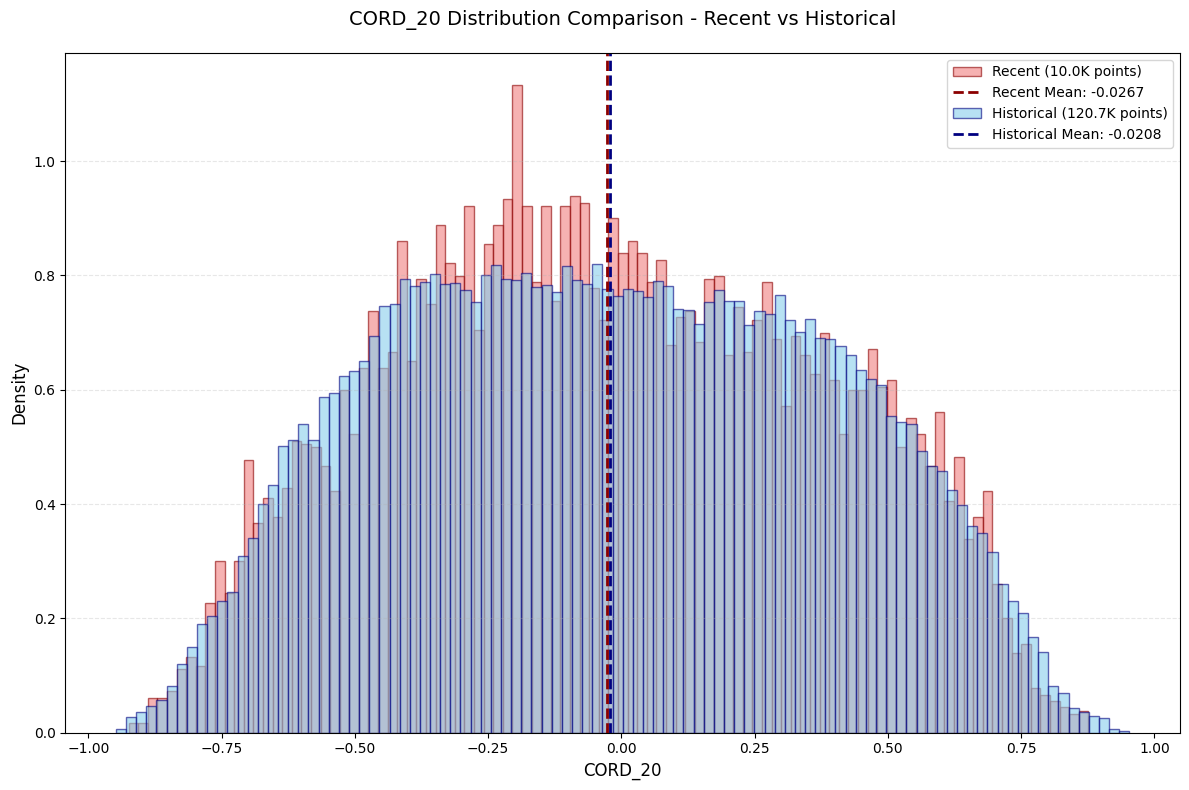

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORD_20

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.006344
   Rank_IC (Spearman): -0.033222
📊 信息比率:
   IR: 0.288481
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORD_30
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


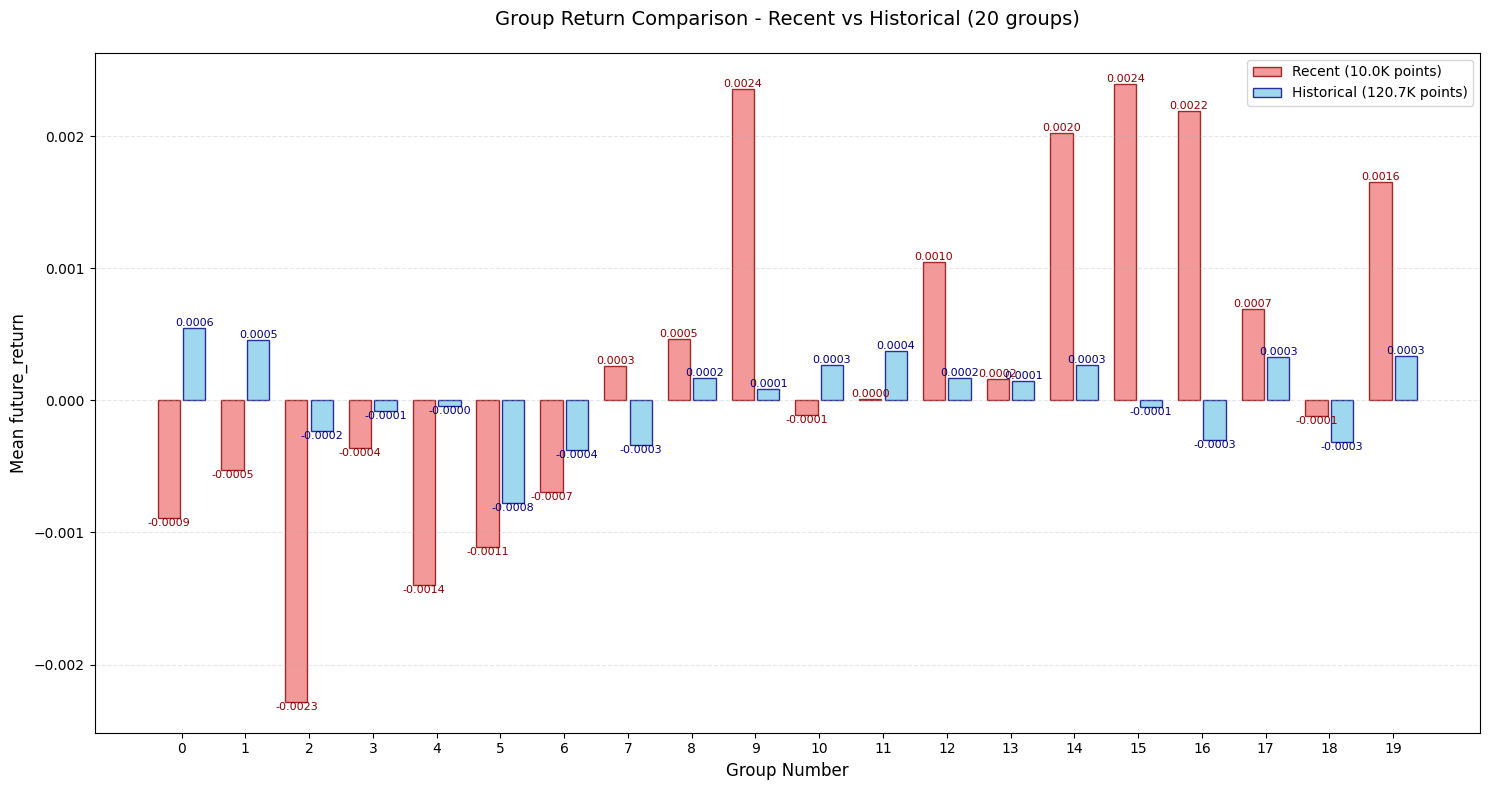

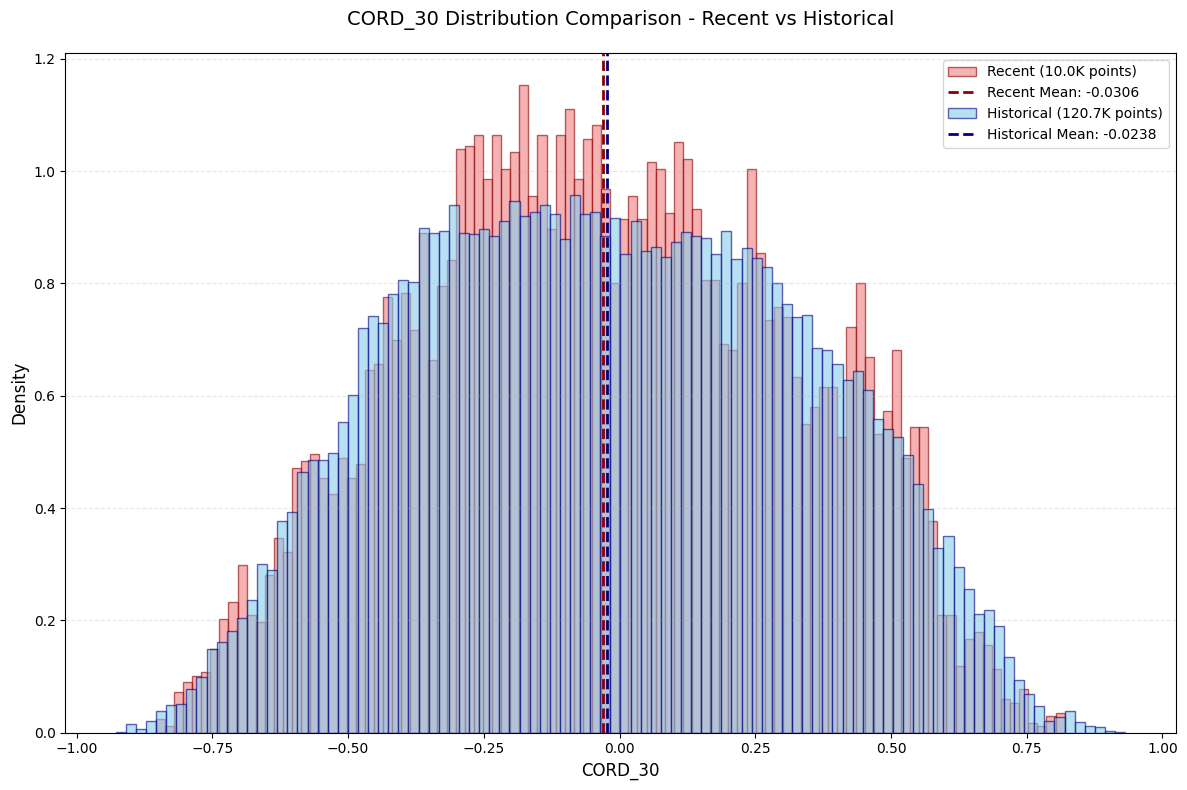

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORD_30

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.011101
   Rank_IC (Spearman): -0.025244
📊 信息比率:
   IR: 0.033718
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORD_60
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


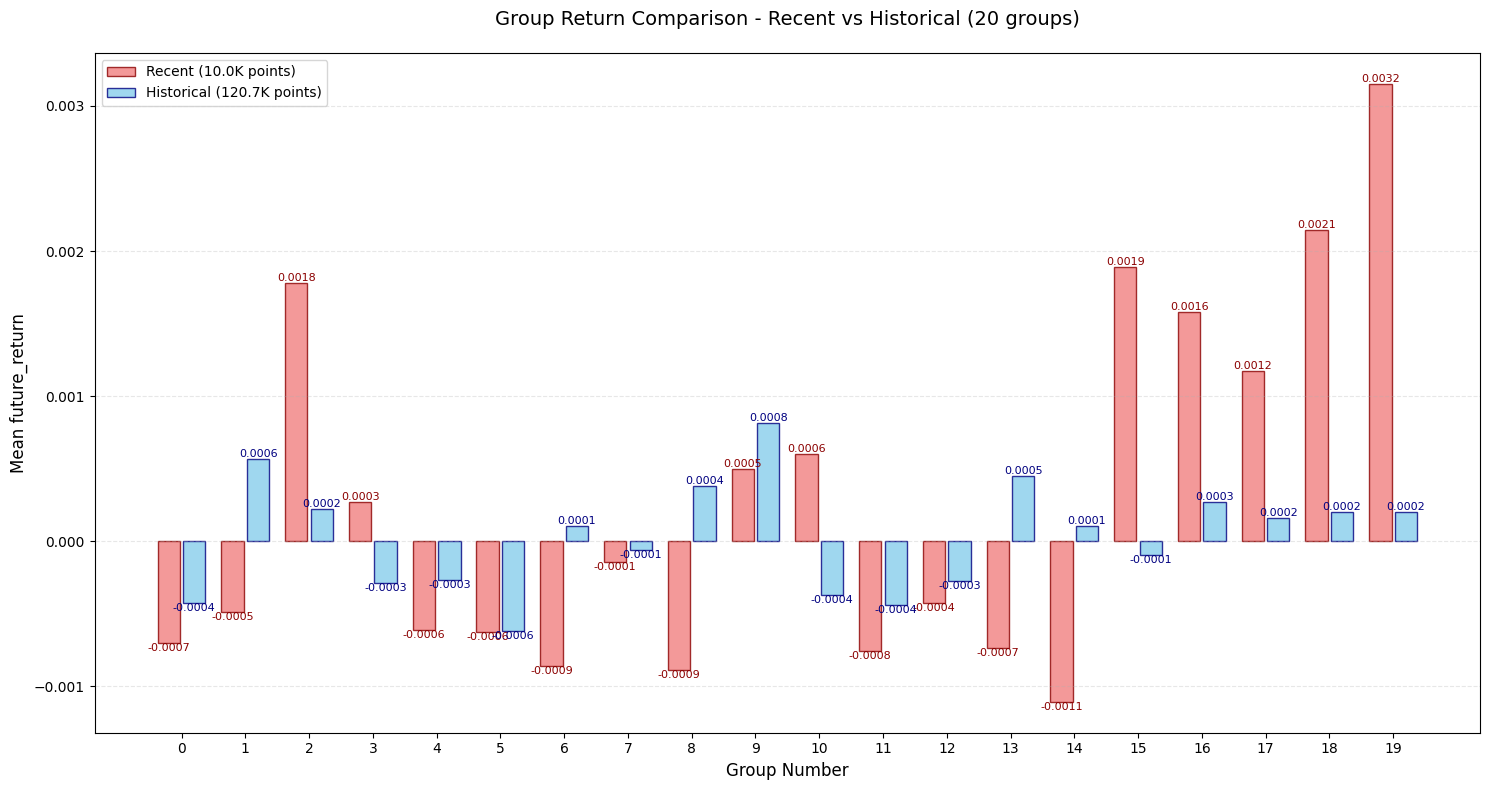

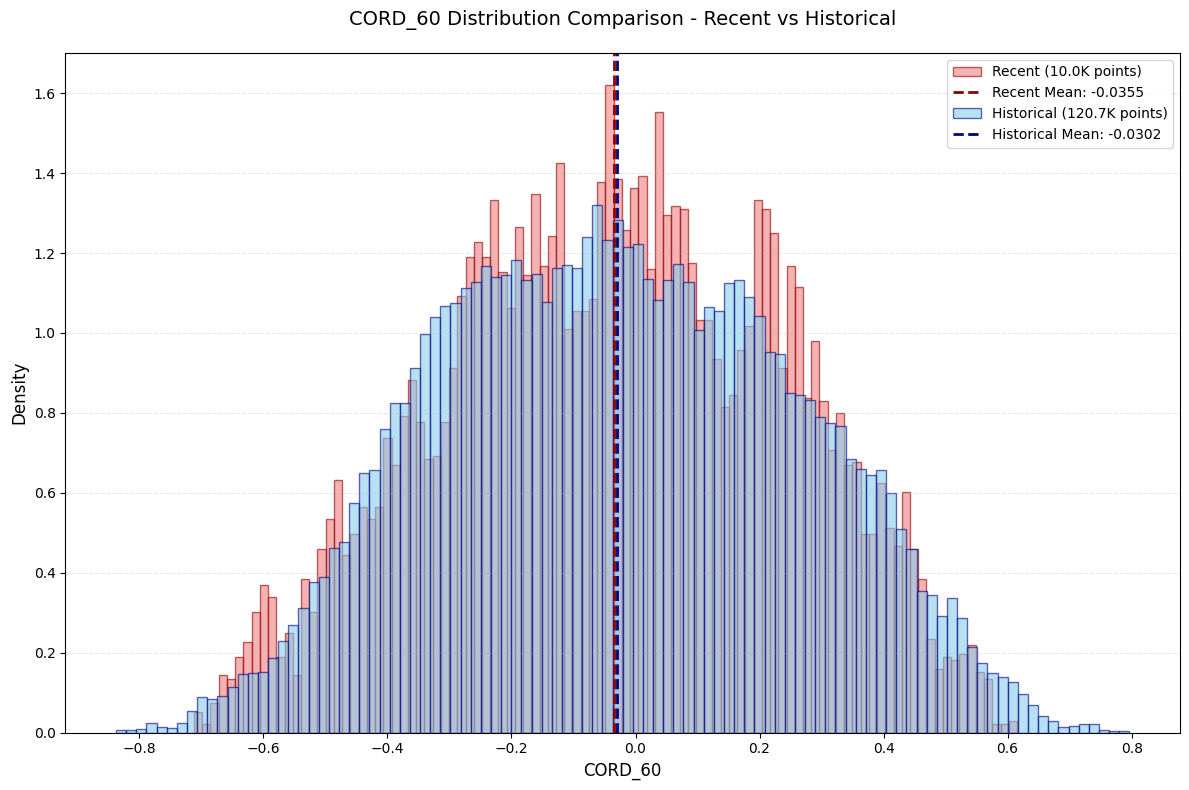

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORD_60

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.005313
   Rank_IC (Spearman): -0.034419
📊 信息比率:
   IR: -0.081652
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORR_5
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


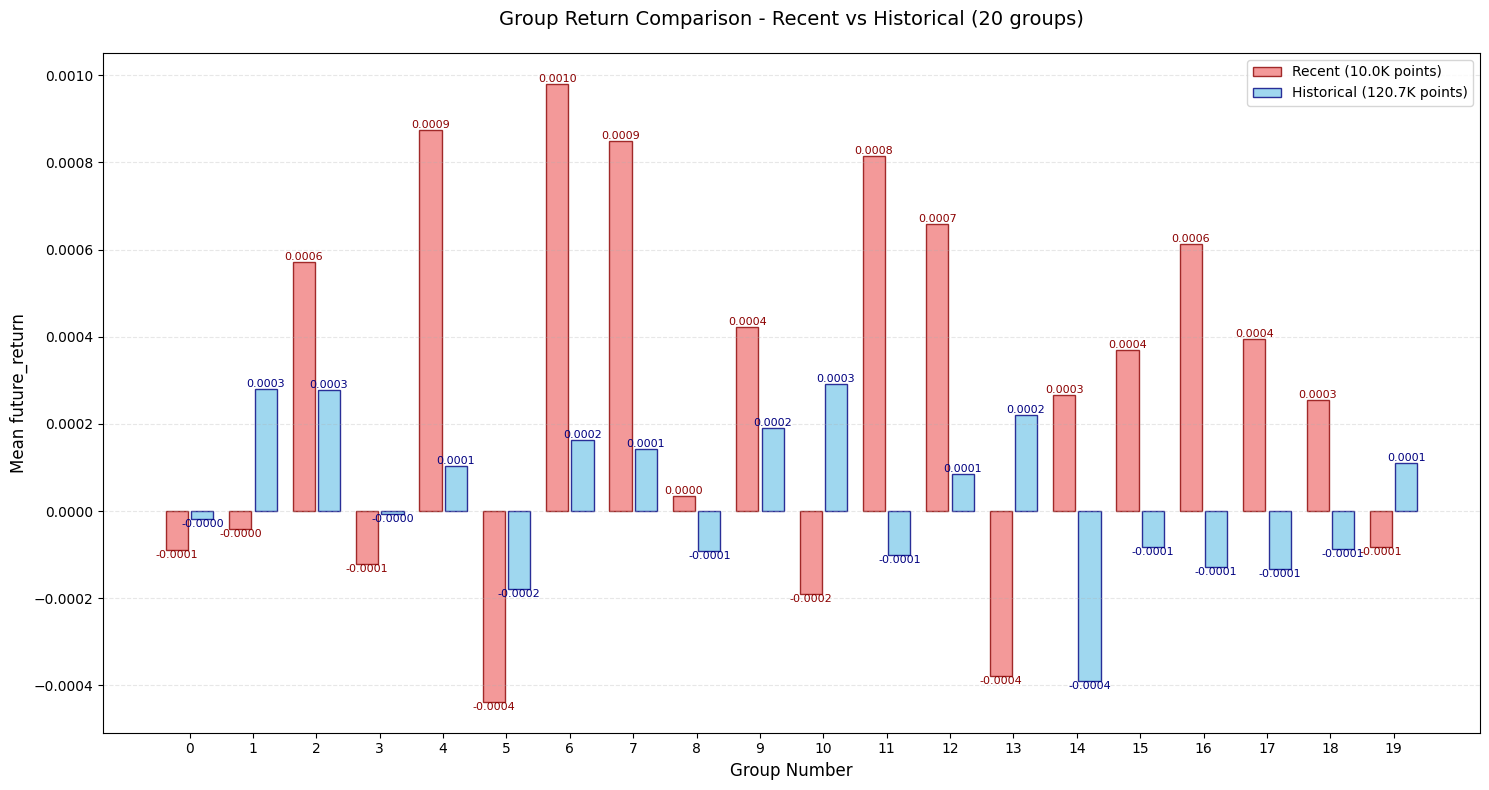

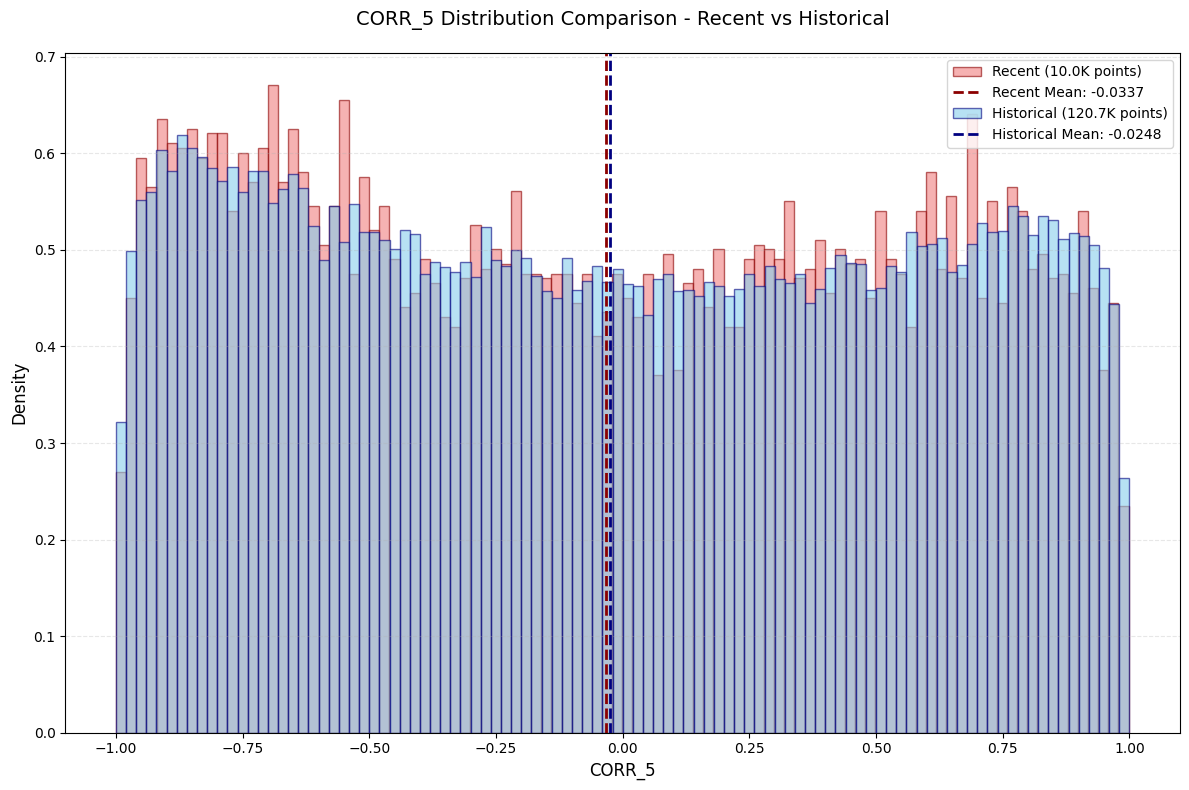

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORR_5

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.007062
   Rank_IC (Spearman): -0.043718
📊 信息比率:
   IR: -0.327984
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORR_10
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


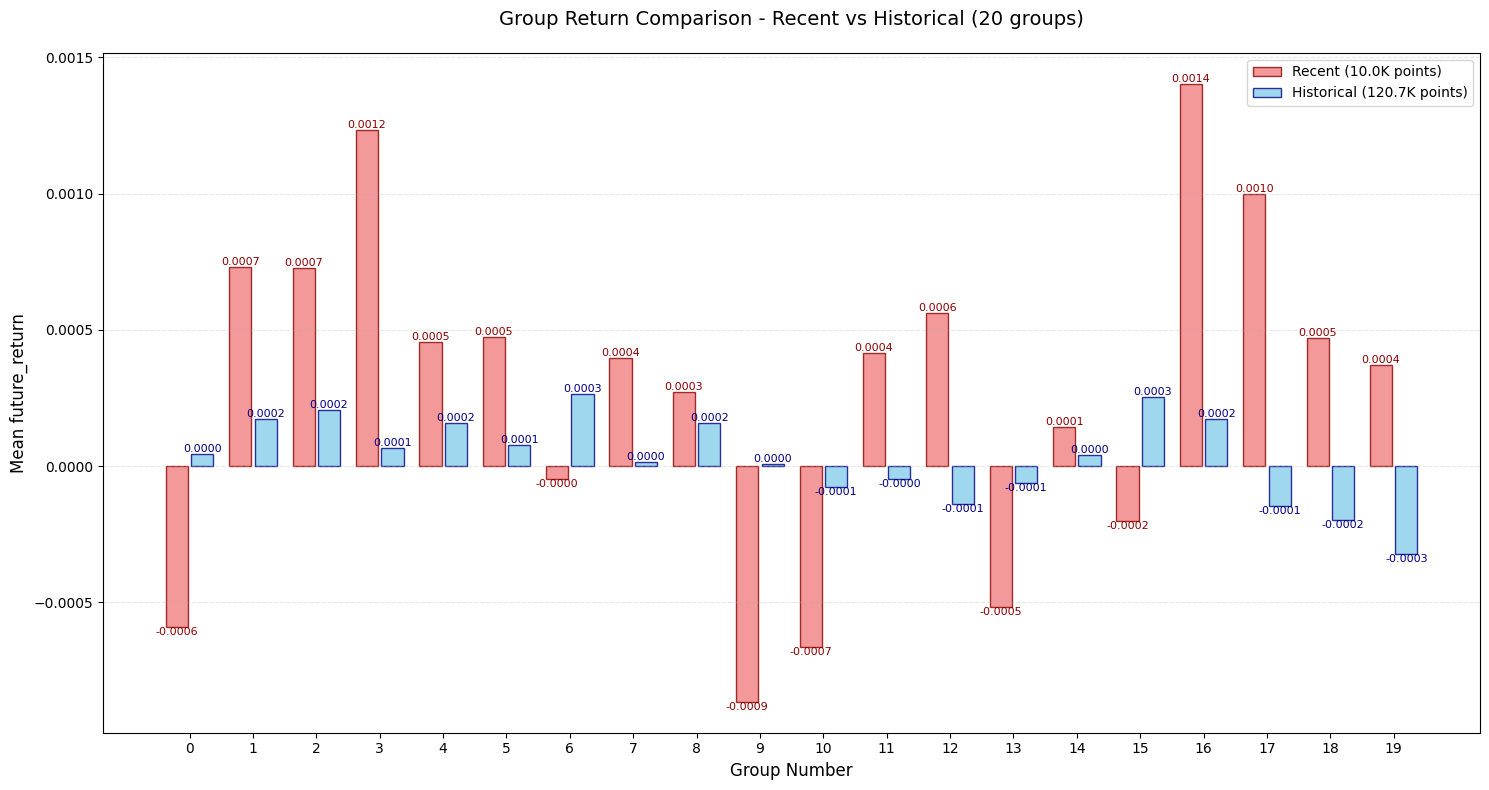

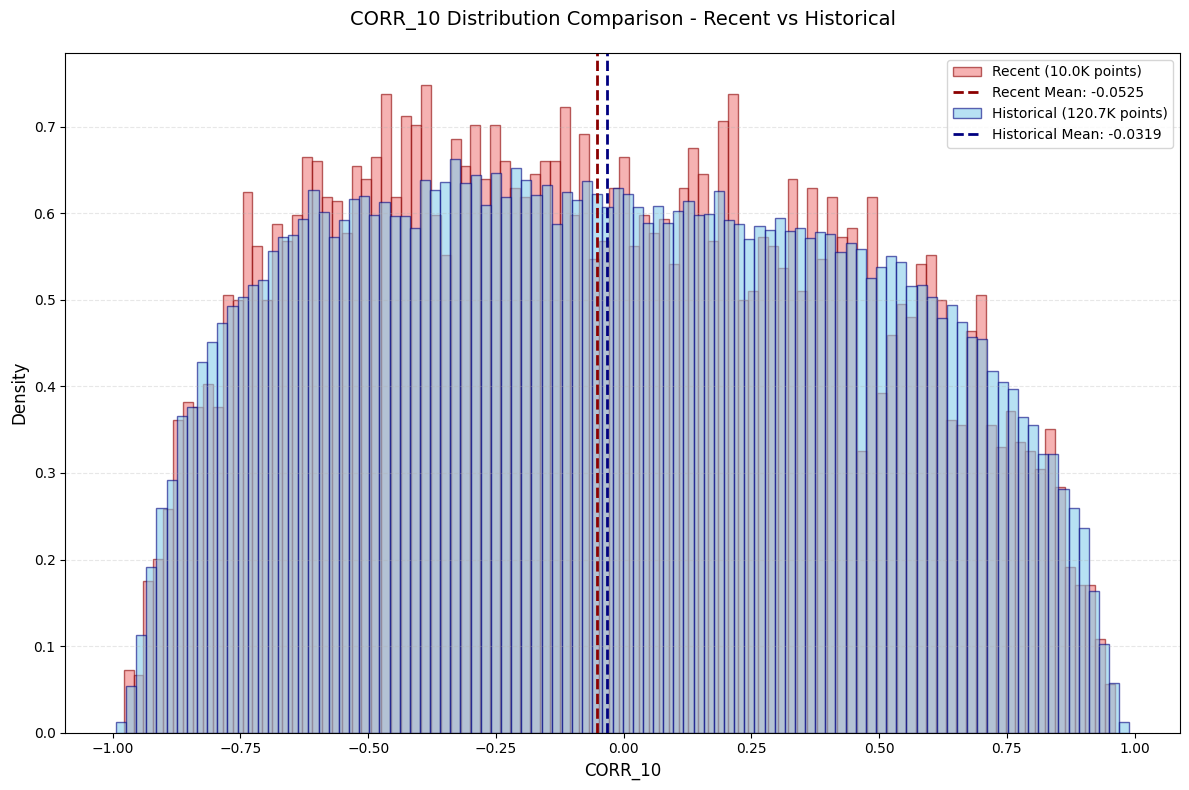

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORR_10

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.001417
   Rank_IC (Spearman): -0.037422
📊 信息比率:
   IR: 0.035853
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORR_20
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


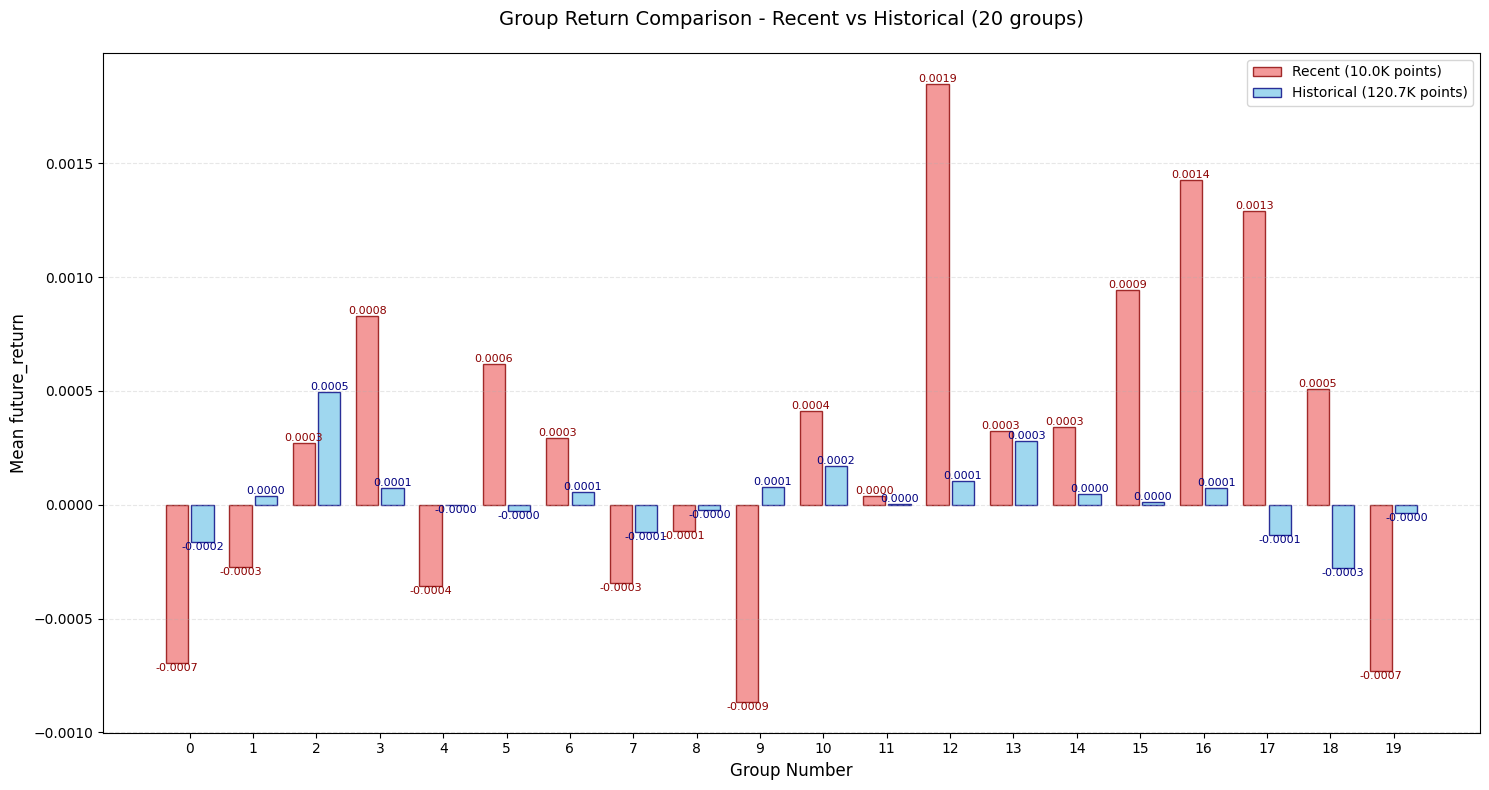

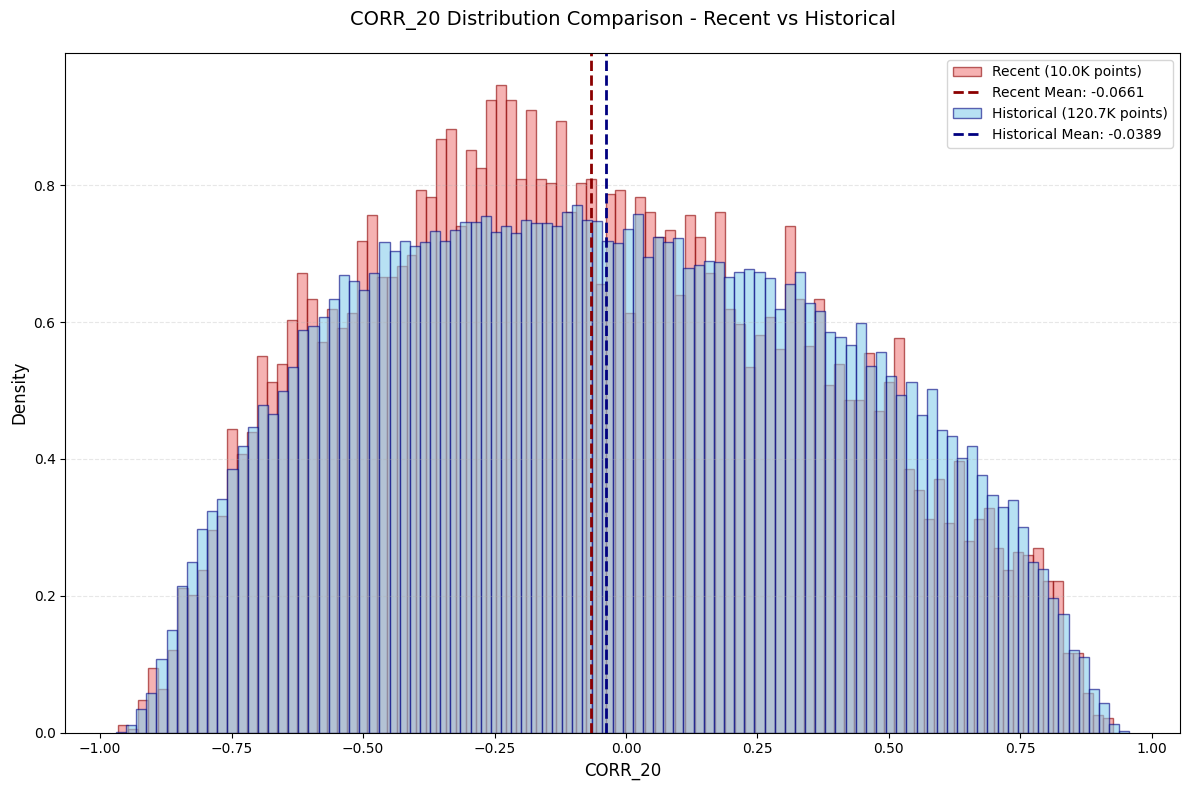

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORR_20

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.002732
   Rank_IC (Spearman): -0.030685
📊 信息比率:
   IR: 0.177211
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORR_30
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


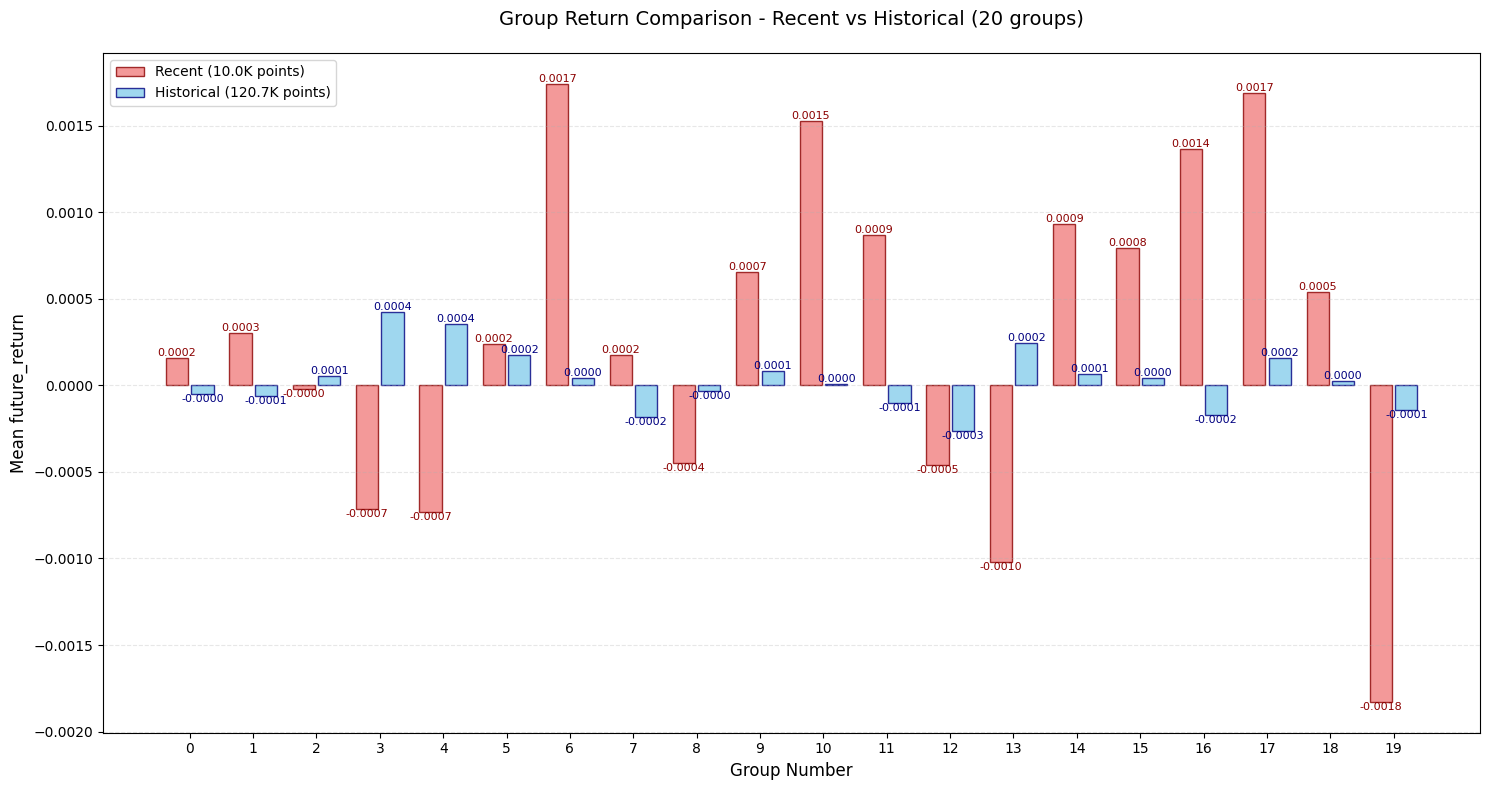

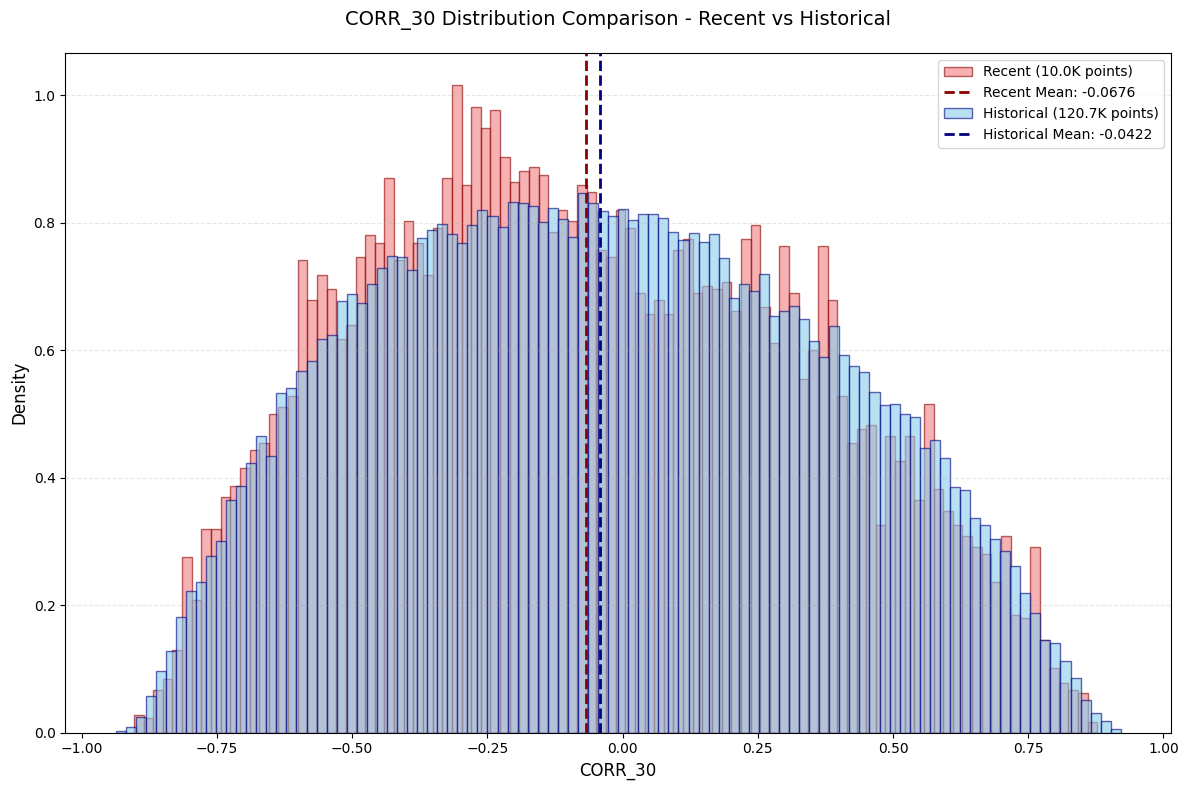

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORR_30

📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.007199
   Rank_IC (Spearman): -0.012823
📊 信息比率:
   IR: 0.056808
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130748
   因子列: CORR_60
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


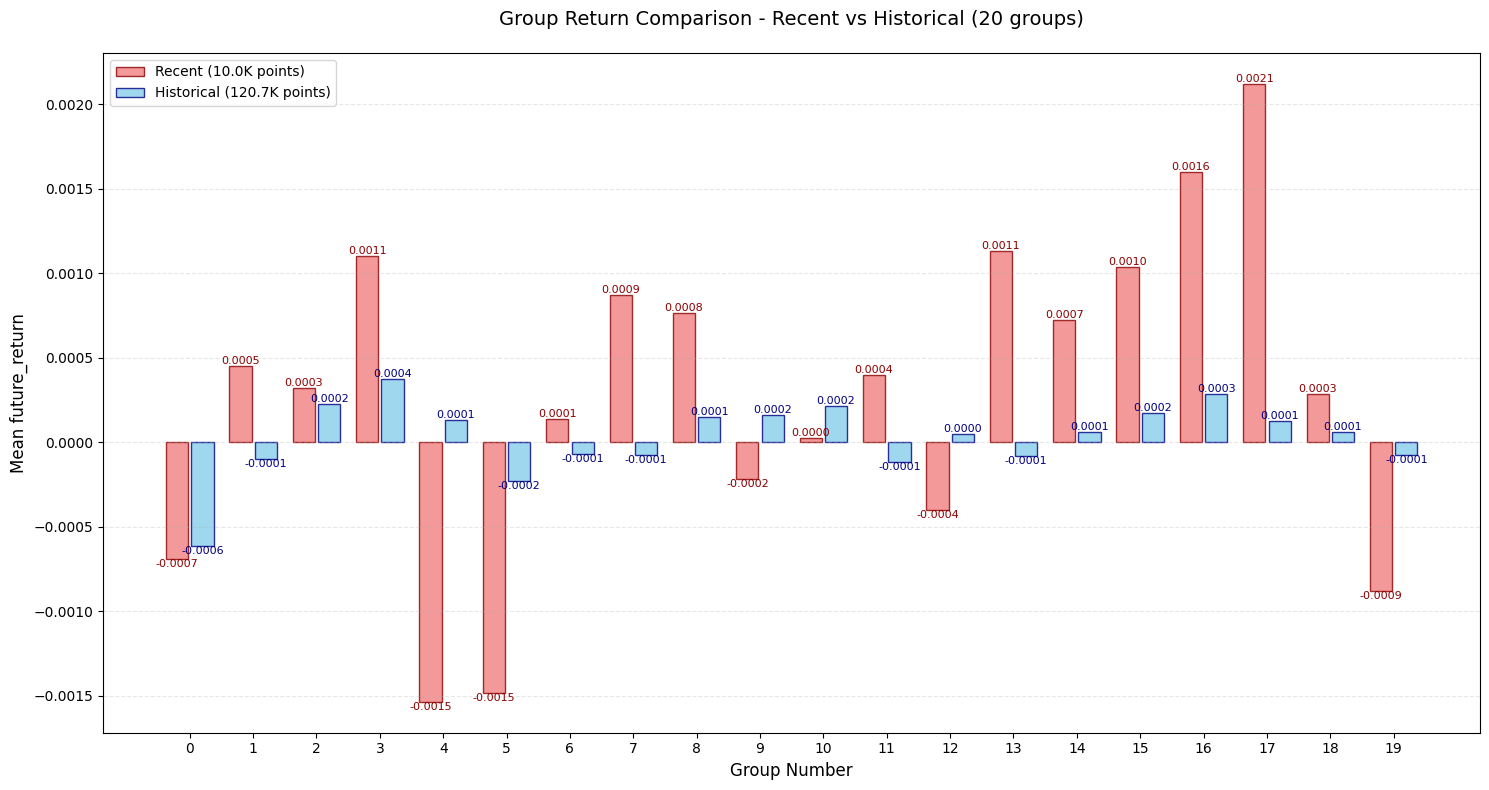

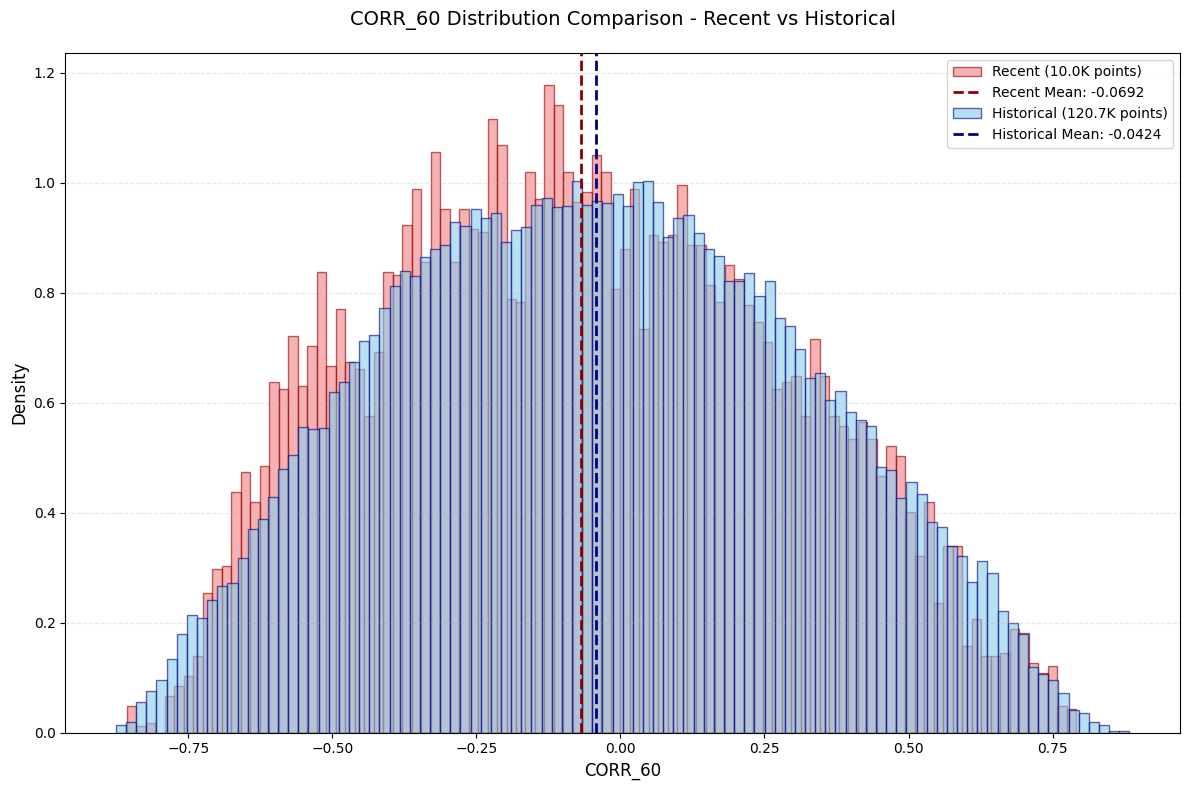

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------
Completed evaluation for CORR_60


In [6]:
# 遍历所有因子和窗口参数
for factor_name, windows in factors_to_test.items():
    for window in windows:
        # 定义因子计算函数（固定窗口参数）
        def factor_func(df, fname=factor_name, win=window):
            if fname == 'WVMA':
                return alpha_WVMA(df, win)
            elif fname == 'CORD':
                return alpha_CORD(df, win)
            elif fname == 'CORR':
                return alpha_CORR(df, win)
            else:
                return pd.Series(np.zeros(len(df)), index=df.index)
        
        # 设置因子名称
        full_factor_name = f"{factor_name}_{window}"
        
        # 设置并评估因子
        evaluator.set_factor(
            factor_data_or_func=lambda df: factor_func(df),
            factor_name=full_factor_name
        )
        
        # 运行评估并存储结果
        result = evaluator.run_full_evaluation(run_stationarity_test=False)
        all_results[full_factor_name] = result
        
        print(f"Completed evaluation for {full_factor_name}")